In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('../TensorFlow-Bootcamp/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(
    lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
import tensorflow as tf

In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [16]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group', ['A', 'B', 'C', 'D'])

In [15]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket(
#     'Group', hash_bucket_size=10)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

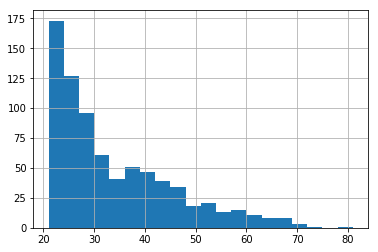

In [18]:
diabetes['Age'].hist(bins=20)

In [19]:
age_bucket = tf.feature_column.bucketized_column(
    age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [21]:
feat_cols = [num_preg, plasma_gluc, dias_press, 
             tricep, insulin, bmi, 
             diabetes_pedigree, assigned_group, age_bucket]

In [22]:
x_data = diabetes.drop('Class', axis=1)

In [24]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [25]:
labels = diabetes['Class']

In [27]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    x_data, labels, test_size=0.3, random_state=101)

In [30]:
input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [31]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpizry_1a5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12534ca58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpizry_1a5/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 296.196
INFO:tensorflow:loss = 6.188251, step = 101 (0.316 sec)
INFO:tensorflow:global_step/sec: 605.001
INFO:tensorflow:loss = 5.8639493, step = 201 (0.166 sec)
INFO:tensorflow:global_step/sec: 537.08
INFO:tensorflow:loss = 4.952702, step = 301 (0.187 sec)
INFO:tensorflow:global_step/sec: 570.891
INFO:tensorflow:loss 

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [34]:
res = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-25-17:56:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpizry_1a5/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-25-17:56:50
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.80448556, auc_precision_recall = 0.64752364, average_loss = 0.5236987, global_step = 1000, label/mean = 0.35064936, loss = 5.0406, precision = 0.64285713, prediction/mean = 0.37151024, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpizry_1a5/model.ckpt-1000


In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [36]:
preds = model.predict(pred_input_func)

In [37]:
list(preds)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpizry_1a5/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.505058], dtype=float32),
  'logits': array([0.02023262], dtype=float32),
  'probabilities': array([0.49494204, 0.505058  ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6570517], dtype=float32),
  'logits': array([0.6501829], dtype=float32),
  'probabilities': array([0.34294832, 0.6570517 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.36036345], dtype=float32),
  'logits': array([-0.573787], dtype=float32),
  'probabilities': array([0.6396365 , 0.36036345], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33732003], dtype=float32),
  'logits': array([-0.67526007], dtype=float32),
  'probabilities': array([0.66268   , 0.33732003], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obje

In [38]:
dnn_model = tf.estimator.DNNClassifier(
    hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmphj_0ph7_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1293f3470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
embedded_group = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [41]:
feat_cols = [num_preg, plasma_gluc, dias_press, 
             tricep, insulin, bmi, 
             diabetes_pedigree, embedded_group, age_bucket]

In [42]:
input_func = tf.estimator.inputs.pandas_input_fn(
    X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [43]:
dnn_model = tf.estimator.DNNClassifier(
    hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpwskspyol', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12963d198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpwskspyol/model.ckpt.
INFO:tensorflow:loss = 6.8740535, step = 1
INFO:tensorflow:global_step/sec: 352.408
INFO:tensorflow:loss = 4.96082, step = 101 (0.285 sec)
INFO:tensorflow:global_step/sec: 592.944
INFO:tensorflow:loss = 4.2927084, step = 201 (0.168 sec)
INFO:tensorflow:global_step/sec: 548.938
INFO:tensorflow:loss = 7.1251793, step = 301 (0.183 sec)
INFO:tensorflow:global_step/sec: 571.096
INFO:tensorflow:loss = 5.0435724, step = 401 (0.174 sec)
INFO:tensorflow:global_step/sec: 542.497
INFO:tensorflow:loss = 4.7674365, step = 501 (0.185 sec)
INFO:tensorflow:global_step/sec: 557.715
INFO:tensorflow:loss = 6.0073466, step = 601 (0.181 sec)
INFO:tensorflow

In [45]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [46]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-25-18:03:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpwskspyol/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-25-18:03:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74891776, accuracy_baseline = 0.64935064, auc = 0.83000004, auc_precision_recall = 0.6874423, average_loss = 0.48137066, global_step = 1000, label/mean = 0.35064936, loss = 4.6331925, precision = 0.63529414, prediction/mean = 0.37701848, recall = 0.6666667
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpwskspyol/model.ckpt-1000


{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83000004,
 'auc_precision_recall': 0.6874423,
 'average_loss': 0.48137066,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6331925,
 'precision': 0.63529414,
 'prediction/mean': 0.37701848,
 'recall': 0.6666667}